In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [37]:
FILEPATH = "HousingData.csv.xls"

df = pd.read_csv(FILEPATH)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [39]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

/var/folders/1f/gq9hvw455wjg13c6mbjdd5dw0000gn/T/ipykernel_45117/3761460322.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], bins=30)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


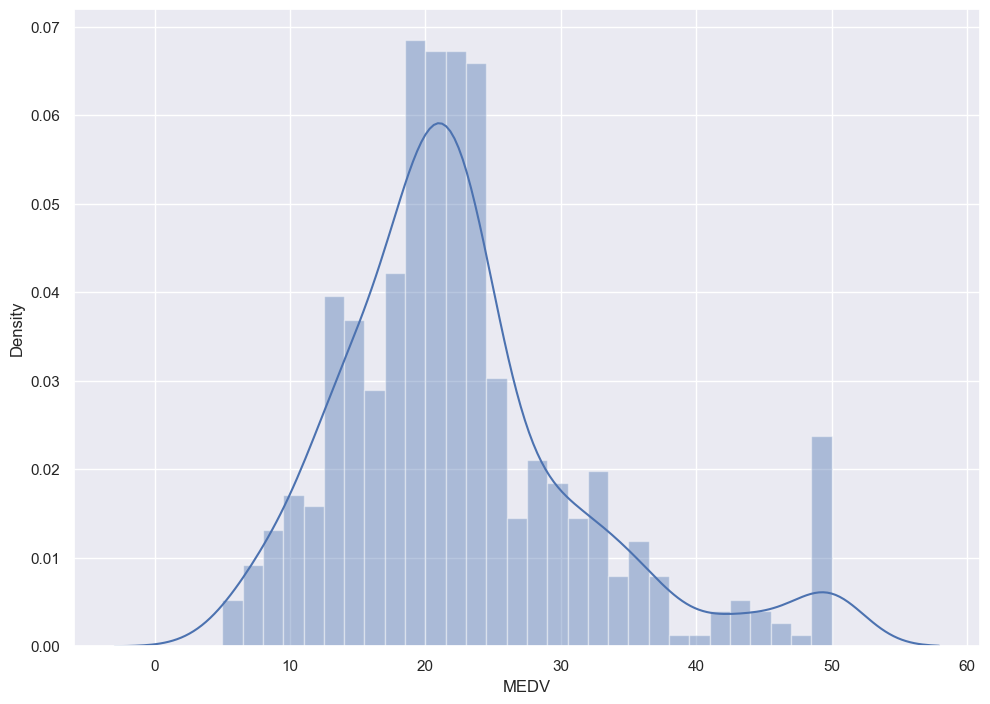

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

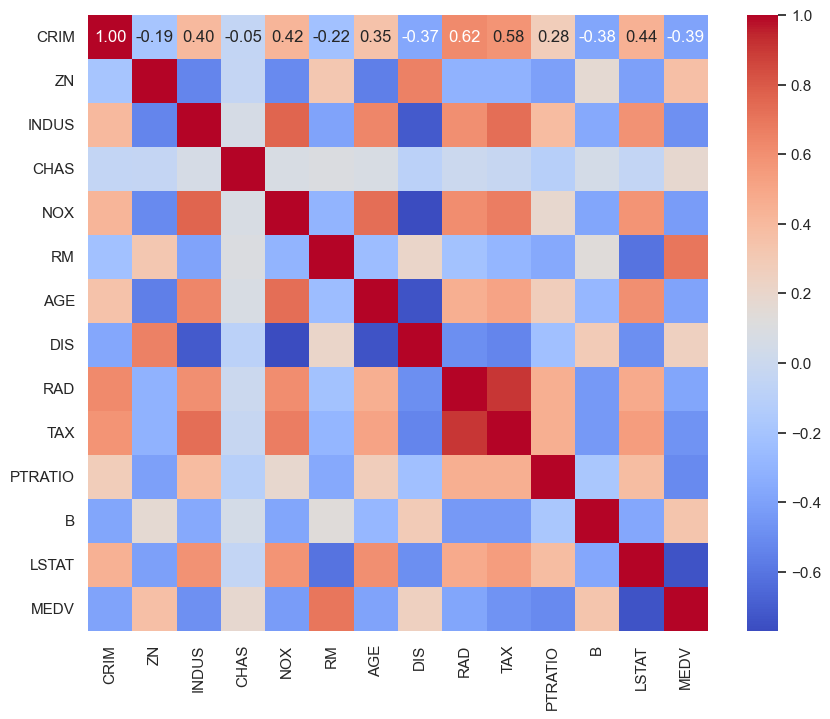

In [41]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

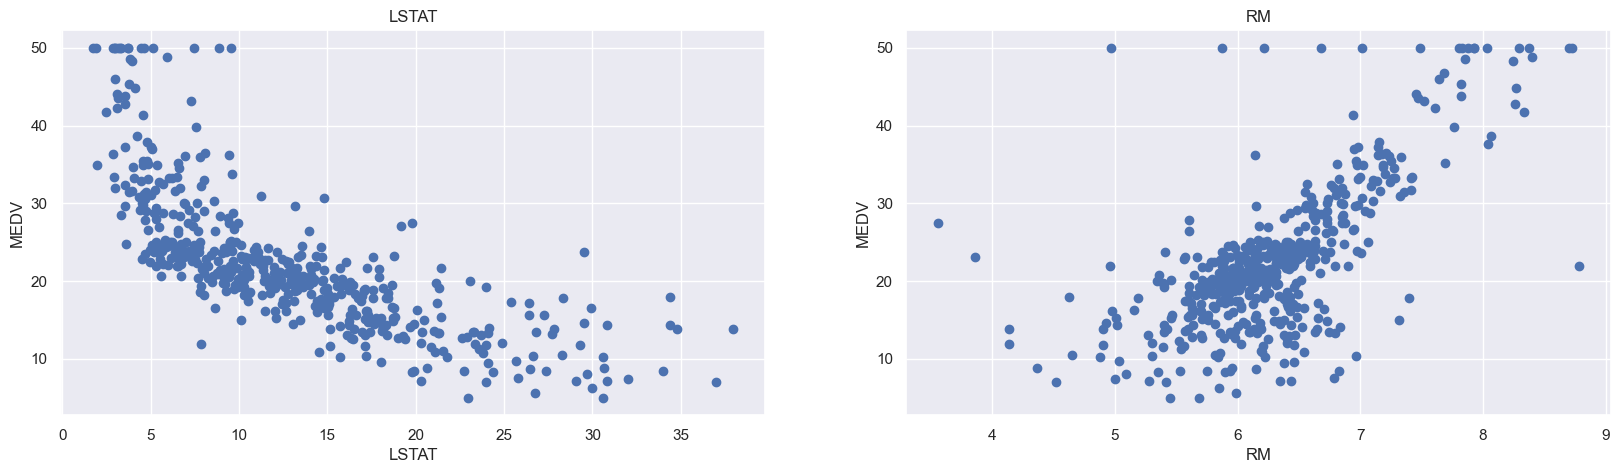

In [42]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [53]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

# Drop rows with missing values
df_combined = pd.concat([X, Y], axis=1)
df_combined_clean = df_combined.dropna()

# Separate X and Y again
X_clean = df_combined_clean.drop(columns=['MEDV'])
Y_clean = df_combined_clean['MEDV']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Drop rows with missing values
df_combined = pd.concat([X_train, Y_train], axis=1)
df_combined_clean = df_combined.dropna()

# Separate X and Y again
X_train_clean = df_combined_clean.drop(columns=['MEDV'])
Y_train_clean = df_combined_clean['MEDV']

# Train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train_clean, Y_train_clean)

LinearRegression()

In [60]:
from sklearn.metrics import r2_score
# Drop rows with missing values
df_test_combined = pd.concat([X_test, Y_test], axis=1)
df_test_combined_clean = df_test_combined.dropna()

y_train_predict = lin_model.predict(X_train_clean)
rmse_train = (np.sqrt(mean_squared_error(Y_train_clean, y_train_predict)))
r2_train = r2_score(Y_train_clean, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))

# Separate X and Y again
X_test_clean = df_test_combined_clean.drop(columns=['MEDV'])
Y_test_clean = df_test_combined_clean['MEDV']

# Model evaluation for testing set
y_test_predict = lin_model.predict(X_test_clean)
rmse = (np.sqrt(mean_squared_error(Y_test_clean, y_test_predict)))
r2 = r2_score(Y_test_clean, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.681810410369197
R2 score is 0.6248882905834675
The model performance for testing set
--------------------------------------
RMSE is 5.17623435494347
R2 score is 0.6582710406492562
